##Investigate survival rate of the titanic passengers by age/sex/fareclass and other possible factors

Hypothesis: Females, young children and rich people (higher fare class) have higher survival rates. 

Process:
    1. Import data 
    2. Convert data into a dataframe
    3. Clean data (fill or remove empty cells, standardize data types)
    4. Plot histogram of survival rate by sex/age/fareclass independently as well as dependently 
    5. Highlight the limitations of the model and talk about the other variables not investigated in this analysis 

#import packages

In [123]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Let's import the data into a dataframe so we can do further statistical analysis 
1. Import data
2. Convert data into a dataframe

In [124]:
import unicodecsv

data = pd.read_csv('titanic-data.csv')


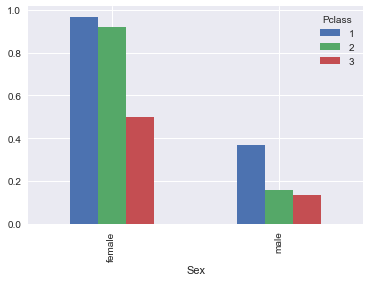

In [125]:
data.groupby(['Sex', 'Pclass'])['Survived'].agg('mean').unstack().plot(kind='bar')

What is the size of the data set? 

In [126]:
data.shape

(891, 12)

12 columns and 891 rows. That is a managable size. 

What are the variables that we are dealing with ? 
Let's view the columns and a sample of the data set.  

In [127]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like there are a few NaN values in the cabin class. It looks like high fares have cabins and low fares do not. We can run a correlation between these two variables after we change the NaN values to 0 at a later time. It is likely it is highly correlated, and we can just investigate the correlation of survival rates and fares (as a proxy to wealth)

The ticket values are not standardized either but it is not important for the analysis so we can ignore that.

I wonder if the numerical numbers are in floats/integers or strings. Let's investigate by figuring out the data types 

In [128]:
data.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It looks like everything is in the right format . We do not need to convert strings to floats.

Now, let's take a deeper dive into the data. I will use data describe to understand the appx distribution and if there are any missing values.

In [129]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this table we know that there were 891 passengers. 
The mean survival rate is 38%. 
The median passenger is in the lowest class (class 3). 
The mean age is ~30 years with a standard distribution of 15 years. It was a generally young crowd who were likely more able bodied. The oldest person was 80 years old. 
There were a few families on the ship - it seems like the largest family has 9 members (max siblingsp 8). I'm not entirely sure how this correlates with Parch but it is not relevant for this study . 

Seems like there are empty cells in age , replace empty cells with median age (so as not to skew the distribution)

In [130]:
data['Age'].fillna(data['Age'].median(), inplace=True)

4. Plot histogram of survival rate by sex/age/fareclass

Hypothesis: Females have a higher survival rate than men (ladies first on the boats)



,female,male
Survived,233,109
Died,81,468


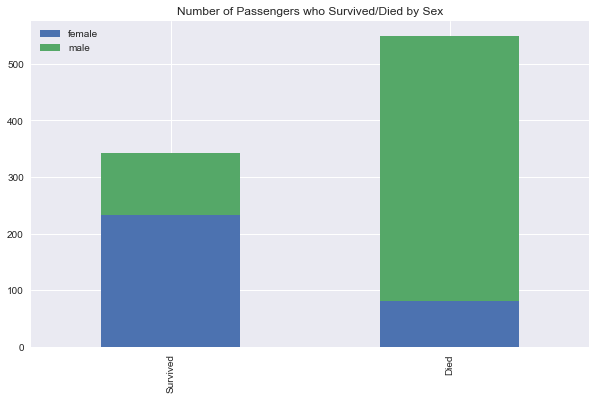

In [131]:
Survived = data[data.Survived == 1]['Sex'].value_counts()
Died = data[data.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(10,6), title="Number of Passengers who Survived/Died by Sex")

# display table
from IPython.display import display
display(df_sex) 



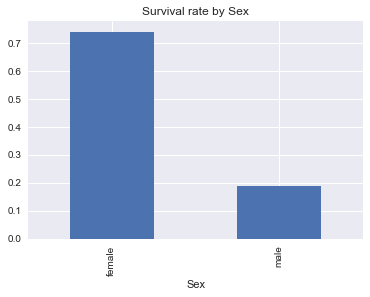

In [132]:
data.groupby(['Sex'])['Survived'].agg('mean').plot(kind='bar',title="Survival rate by Sex")

In [133]:
data.groupby(['Sex'])['Survived'].agg('mean')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Here it is clear that females have a much higher survival rate (74%) than the mean (38%). Conversely, males have a much lower survival rate(19%). 



In [134]:
#Start a new column of age-groups 
data['Agegrp'] = pd.cut(data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 100])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


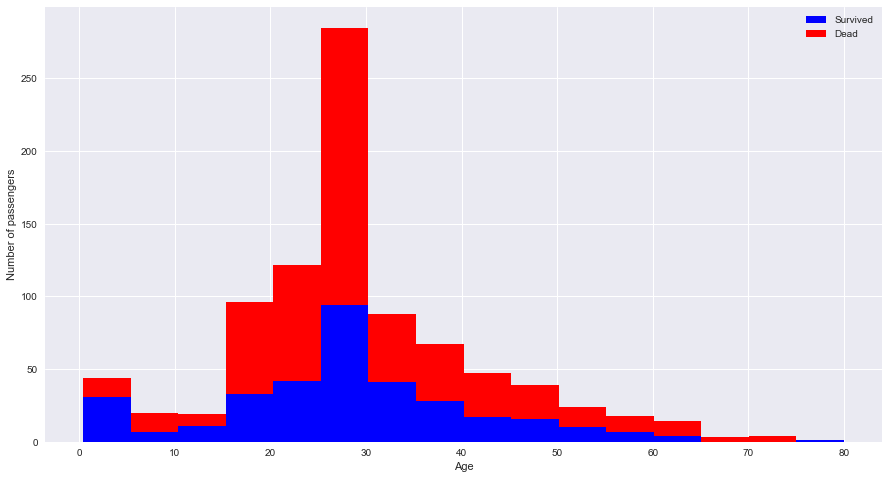

In [135]:
#Histogram of age group 

figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 16,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

The population histogram shows that the majority of the passengers were adults between 20 and 35.

Note that since we had set the age of passengers with no age (NaN) values with the median age (29) which explains the anomolous bar between age 26-30. It also show's that that group has the highest survival rate but that is unlikely to be true. 

Children under the age of 5 has the highest survival rate. 

We will group the passengers by ages of 10 to find the specific survival rate.

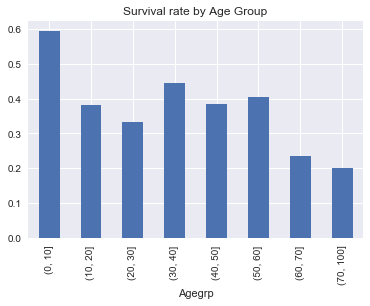

In [136]:
#Plot survival rate by age bins 
data.groupby(['Agegrp'])['Survived'].agg('mean').plot(kind='bar',title="Survival rate by Age Group")

In [137]:
#print survival rate
#Plot survival rate by age bins 
data.groupby(['Agegrp'])['Survived'].agg('mean')

Agegrp
(0, 10]      0.593750
(10, 20]     0.382609
(20, 30]     0.334152
(30, 40]     0.445161
(40, 50]     0.383721
(50, 60]     0.404762
(60, 70]     0.235294
(70, 100]    0.200000
Name: Survived, dtype: float64

Here, it is obvious that children under the age of 11 have the highest survival rate at 59%. Between 11-20, survival rate of the teenager is not different from the mean at 38%. 

Survival rate then drops to 36% between 21 and 30 but that can be because we have classified the passengers with no defined age (NaN values) to the mean of age 29, which  have skewed the actual survival rate of that age class.

We see an increase of survival rate then picks up between 31 and 60 before dropping off again. 

Elderly passengers may not have gotten on the boats (they've lived a good life!) or may not have survived the elements outside of the cruise ship. 

Now to investigate survival demographics by fare class

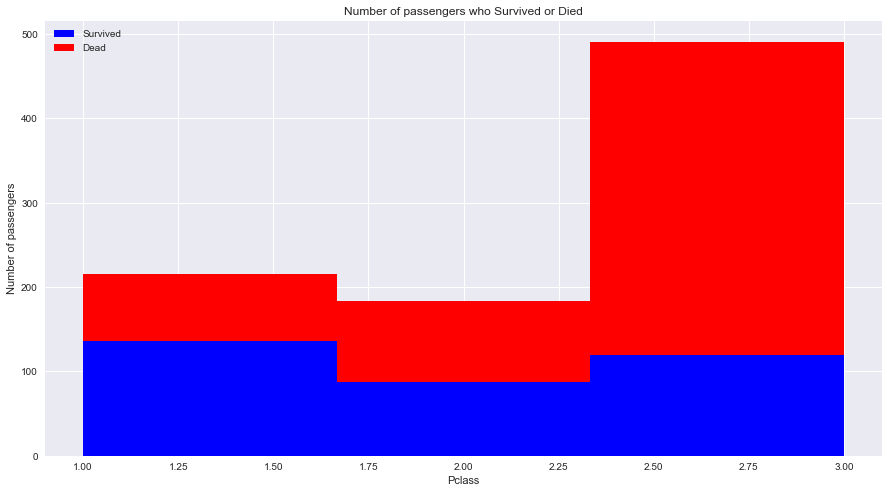

In [138]:
#Plot histogram of survived vs did not survive by fare class
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']], stacked=True, color = ['b','r'],
         bins = 3,label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.title('Number of passengers who Survived or Died')
plt.legend()


Here, we see that the majority of the passengers were from the third class paying the cheapest fare. They have the lowest survival rate. Generally the higher the class, the higher the survival rate. Let's get more specific with the actual survival rate below.

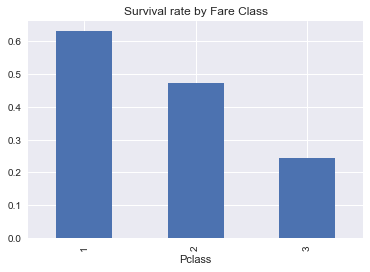

In [139]:
#Plot survival rate by passenger class
data.groupby(['Pclass'])['Survived'].agg('mean').plot(kind='bar',title="Survival rate by Fare Class")

In [140]:
data.groupby(['Pclass'])['Survived'].agg('mean')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Here there is a clear correlation of class vs survival rate. Passengers in class one has a high survival rate of 63%, class 2 at 47% and the lowest class (3) at 24%. 
Passengers from the lowest fare class has the lowest survival rate

Now let's investigate survival rates with 2 variables : Fares and Age 

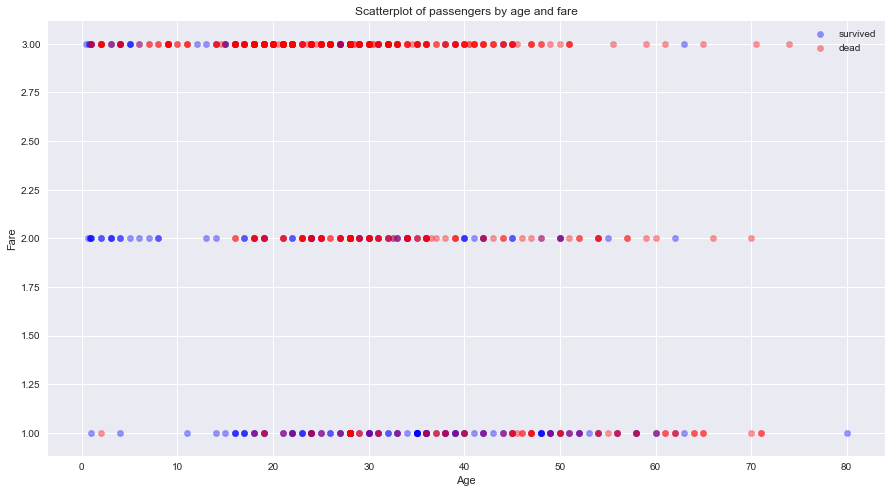

In [156]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Pclass'],c='blue',s=40, alpha=0.4)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Pclass'],c='red',s=40,  alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Scatterplot of passengers by age and fare')
ax.legend(('survived','dead'),scatterpoints=1)


Here it is obvious that Fare class is a stronger determinant of survival rates. 
Passengers in Fare class 1 has a high survival rate than 2 , and 2 of 3. 
Unless you are under 10 years old  and in Fare class 3, you are as good as gone. 
Passengers under under 20 years old in Fare class 2 have high survival rates, but the same can't be said about the other ages.
Passengers from Fare class 1, have high survival rates across the ages under 55. Money does buy longevity. 

Now let's explore this by gender


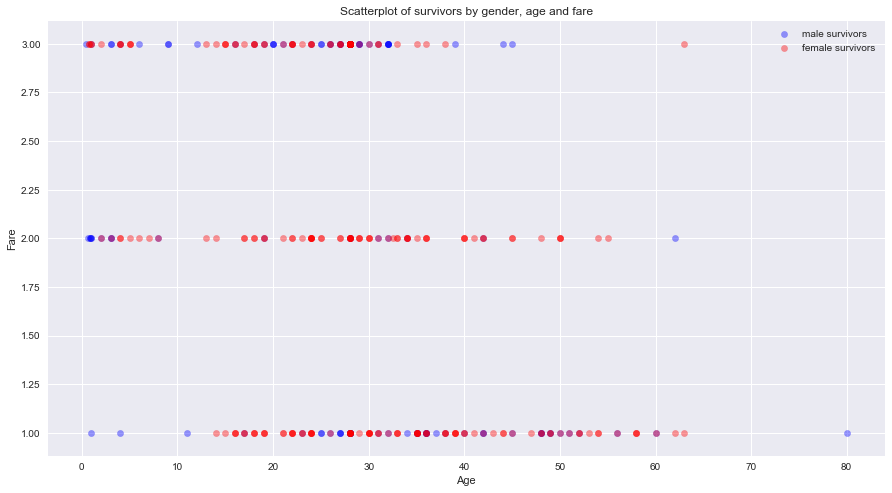

In [155]:
# show scatter plot of survivors by age/fare class/ gender
df_survived_male = data[(data['Survived']==1) & (data['Sex'] == 'male')]
df_survived_female = data[(data['Survived']==1) & (data['Sex'] == 'female')]

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(df_survived_male['Age'],df_survived_male['Pclass'],c='blue',s=40,alpha=0.4)
ax.scatter(df_survived_female['Age'],df_survived_female['Pclass'],c='red',s=40,alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('male survivors','female survivors'),scatterpoints=1)
ax.set_title('Scatterplot of survivors by gender, age and fare')
plt.show() 




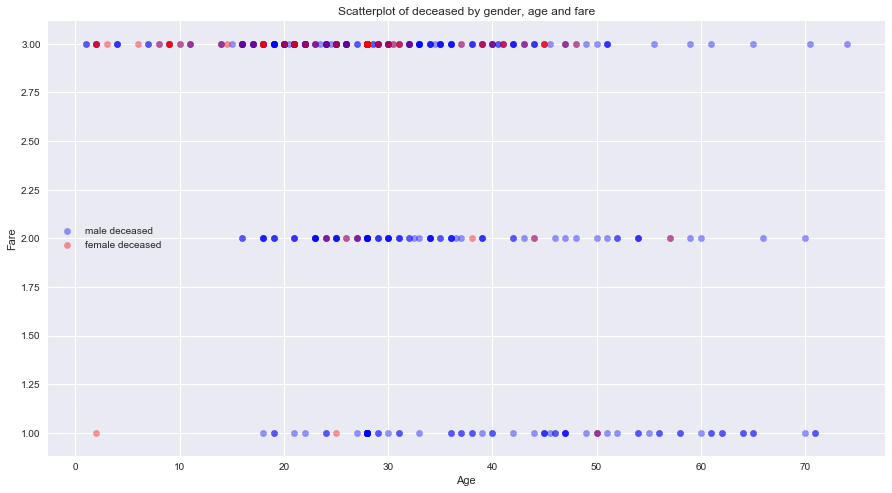

In [154]:
# show scatter plot of deceased by age/fare class/ gender
df_dead_male = data[(data['Survived']==0) & (data['Sex'] == 'male')]
df_dead_female = data[(data['Survived']==0) & (data['Sex'] == 'female')]

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(df_dead_male['Age'],df_dead_male['Pclass'],c='blue',s=40,alpha=0.4)
ax.scatter(df_dead_female['Age'],df_dead_female['Pclass'],c='red',s=40,alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('male deceased','female deceased'),scatterpoints=1)
ax.set_title('Scatterplot of deceased by gender, age and fare')
plt.show() 



Comparing the scatter plots of the survivors vs deceased by gender, it is clear that gender affects survivability more than fare class or age. 

Summary:
1. Of the 891 passengers of the boat, 342 survived. The survival rate is 38%. 
2. Females have a higher rate of survival at 74% and compared to males at 19%
3. Children (under 5) have a higher rate of survival.
4. Richer passengers who pay a higher fare also have a higher rate of survival.
5. Gender is the greatest determinant of survival rate, fare class and age (unless you are under 10, then you are as good as saved) 

Limitations: The studies here illustrate correlation not causation. While we can observe "women, children and the rich have higher survival rates" we do not know first-hand the cause of these observations. 

Additionally, statistical tests such as a t-test was not used. (T-test is preferred because of the small sample size). The points made above were observational without the application of the t-test. 

For future study:
There are also other variables that are unexplored such as siblings and parent variables. It would be interesting to understand if whole families are saved. However, this is beyond my ability at this point. 


References
https://www.kaggle.com/sramml/simple-tutorial-for-beginners?scriptVersionId=1408653
http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html 
https://www.kaggle.com/shivendra91/rolling-in-the-deep